### Instructions:

1. Import all the libraries you need in the cell below
2. Create as many cells as needed to answer a question
  * Group code that is logically related in the same cell
  * Keep cells relatively small
  * Format long statements or expressions, including `ggplot`, across multiple lines
3. Submit your work to Github
  * Folder should be called `week_4_practical`
  * This file should be called `week_4_solution.ipynb`
    

In [80]:
# Write you library imports here. E.g.:
# library(ggplot2 )

library(ggplot2)
library(tidyverse)

### Q.1

* Write a function that manually computes the standard deviation.
  * Call your function `sd_x`

Recall that the standard deviation is computed as

$$
\sigma = \sqrt{\frac{\sum{(x_i - \mu)^2}}{N-1}}
$$

* $\mu$ is simply the mean of the vector of inputs
  * it can be computed using the `mean` function


For example, given:

```x = c(1,2,3)```

Since $\mu = 2$, then $\sigma = \sqrt{\frac{(1-2)^2 + (2-2)^2 + (3-2)^2}{3}} = 1$.

* Important: What do you do if this function is called with a single element?
  * Recall that we cannot compute the std deviation of a single value

* Use `assertthat` to make sure that `sd_x` and `sd` return the same values for 3 test vectors of your choice.

In [81]:
# Write you answer here and use more cell if needed

x = c(1,2,3)



sd_x<-function(x){
    sqrt(sum((x-mean(x))^2)/ (length(x)-1))
}

sd_x(x)

#note: can also define intermediate variables, important if function is really complicated

[1] 1

### Q2

* In this question, we will build a simulated dataset for healthy and diseased corals.  You will be creating a `tibble` called `coral_health_tbl` that contains 2 columns:

1. A column called `coral`. Generate this column by sampling 100 coral species from the following values
```
coral_pop = c("Montipora capitata",
  "Porites compressa",
  "Porites lobata")
```
 * You can use the function `sample` to select 100 values from the vector `coral_pop`
 
2. The second column is called `health_status`.
    * it represents 100 randomly selected `TRUE` or `FALSE` values that represent whether the coral is healthy or diseased.
    * Healthy corals (`health_status == FALSE`; not diseased) occur with a probability of 0.8 wheras diseased (`health_status == TRUE`) corals occur with a probability of 0.3.
    * You can use sample again but modify the `prob` parameter to account for the differet probabilities


In [127]:
# Write you answer here and use more cell if needed

coral_pop = c("Montipora capitata",
"Porites compressa",
"Porites lobata")

coral<-sample(coral_pop, size=100, replace=TRUE)

coral_health_logic = c("TRUE",
                "FALSE")

health_status<-as.logical(sample(coral_health_logic, size=100, replace=TRUE, prob = c(0.2, 0.8)))

coral_health<-data.frame(coral, health_status)

coral_health_tbl<-as_tibble(coral_health)

print(coral_health_tbl)

# A tibble: 100 x 2
   coral              health_status
   <fct>              <lgl>        
 1 Porites lobata     FALSE        
 2 Montipora capitata FALSE        
 3 Porites compressa  FALSE        
 4 Porites lobata     FALSE        
 5 Porites lobata     TRUE         
 6 Porites lobata     FALSE        
 7 Montipora capitata FALSE        
 8 Montipora capitata FALSE        
 9 Montipora capitata FALSE        
10 Montipora capitata FALSE        
# … with 90 more rows


### Q3

* Create a new column in `coral_health_tbl` called `coral_cover`
* This column represents coral cover values for the corals observed in your tibble

* For the healthy coral (`health_status = FALSE`), sample the cover values from a normal with mean 9 and std of 2
* For the diseased corals (`health_status = TRUE`), sample the cover values from a normal with mean 1 and std of 3
* Note that this is a perfect scenario for using `tapply` or `mapply`

In [131]:
return_cover <- function(x) {
  if (x == FALSE) {
    rnorm(1, 1, 3) 
  }else if(x == TRUE){
    rnorm(1, 9, 2)
      }
    }
return_cover(TRUE)
return_cover(FALSE)

coral_cover = mapply(return_cover, coral_health_tbl$health_status)
print(coral_cover)

coral_cover_tbl = data.frame(coral, health_status, coral_cover)
coral_cover_tbl

[1] 10.7291

[1] 0.5817598

  [1]  2.77254535 -0.17758539 -0.78763163  0.29461320  9.45765343  3.85842432
  [7]  2.85987291 -1.21163565  5.05751010 -1.46688915  8.80545204  6.80381805
 [13]  1.35960329 -2.19581502  2.63744964 -2.81480280 10.00961993 10.59191994
 [19]  8.97693452  8.86734767 10.54071270 -4.85744623  2.16105611 11.20661551
 [25]  3.11837758  4.22680286 -0.19273669  2.07795188 -2.08739466  3.13745472
 [31] -2.06943782 -5.61599717 -2.94967115 -1.71390545 12.50570857 12.43303180
 [37]  6.65325466 -1.26652906 -0.23688932 10.11010484  8.83125541 -0.71577358
 [43] -2.92500936 10.11889437 -4.86013379  9.26481332  3.59543040  7.84880115
 [49]  8.95508418  6.72130809  9.67514396  5.47722443 -0.09948753  2.78890341
 [55]  3.01271658 -0.77645535  1.43566084 -6.86074011  2.35400795  0.81620730
 [61] -0.21406853  4.12586431 -3.81646501 12.35298716  9.44616984  2.60078451
 [67]  0.57890076  3.53966994  3.77559887  2.72796990 -1.06539606  5.40288820
 [73]  2.34075649  6.72760403 11.60348149  3.51555537  6.0692590

coral,health_status,coral_cover
Porites lobata,FALSE,2.7725453
Montipora capitata,FALSE,-0.1775854
Porites compressa,FALSE,-0.7876316
Porites lobata,FALSE,0.2946132
Porites lobata,TRUE,9.4576534
Porites lobata,FALSE,3.8584243
Montipora capitata,FALSE,2.8598729
Montipora capitata,FALSE,-1.2116356
Montipora capitata,FALSE,5.0575101
Montipora capitata,FALSE,-1.4668892


### Q4

* Add another column called `binary_health_status`.
 * set the column to 0 if `health_status == FALSE`
 * set the column to 1 if `health_status == TRUE`

* A trick here is to remember that:
  1. Corecing (converting) a logical can be done with `as.integer()`
  2. `as.integer(TRUE)` returns 1
  3. `as.integer(FALSE)` returns 0




In [134]:
# Write you answer here and use more cell if needed

return_health_status_binary <- function(x) {
  if (x == FALSE) {
    as.integer(FALSE) 
  }else if(x == TRUE){
    as.integer(TRUE)
      }
    }

return_health_status_binary(FALSE)
return_health_status_binary(TRUE)

binary_health_status = mapply(return_health_status_binary, coral_health_tbl$health_status)
print(binary_health_status)

coral_cover_tbl = data.frame(coral, health_status, coral_cover, binary_health_status)

coral_cover_tbl

[1] 0

[1] 1

  [1] 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 [38] 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 [75] 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0


coral,health_status,coral_cover,binary_health_status
Porites lobata,FALSE,2.7725453,0
Montipora capitata,FALSE,-0.1775854,0
Porites compressa,FALSE,-0.7876316,0
Porites lobata,FALSE,0.2946132,0
Porites lobata,TRUE,9.4576534,1
Porites lobata,FALSE,3.8584243,0
Montipora capitata,FALSE,2.8598729,0
Montipora capitata,FALSE,-1.2116356,0
Montipora capitata,FALSE,5.0575101,0
Montipora capitata,FALSE,-1.4668892,0


### Q5

* Plot the distribution of `coral_cover` for healthy versus diseased corals
* Note that I am using a histogram `geom`
  * Histograms need only a `x` axis because the `y` is computed (count)
    * However, instead of a raw count, we want a normalized count. You can normalize the count by setting `y = stat(count / sum(count))`  
  * I am coloring the bin outlines in black and filling in grey for disease and white for healthy
  * I am using `binwidth=1'.
* use the `labs` function to add a title and to change the labels for the `x` and `y` axes
* The plot should look like the following
![](https://www.dropbox.com/s/wdbdj05rd50vb0k/healthy-diseased.png?dl=1)

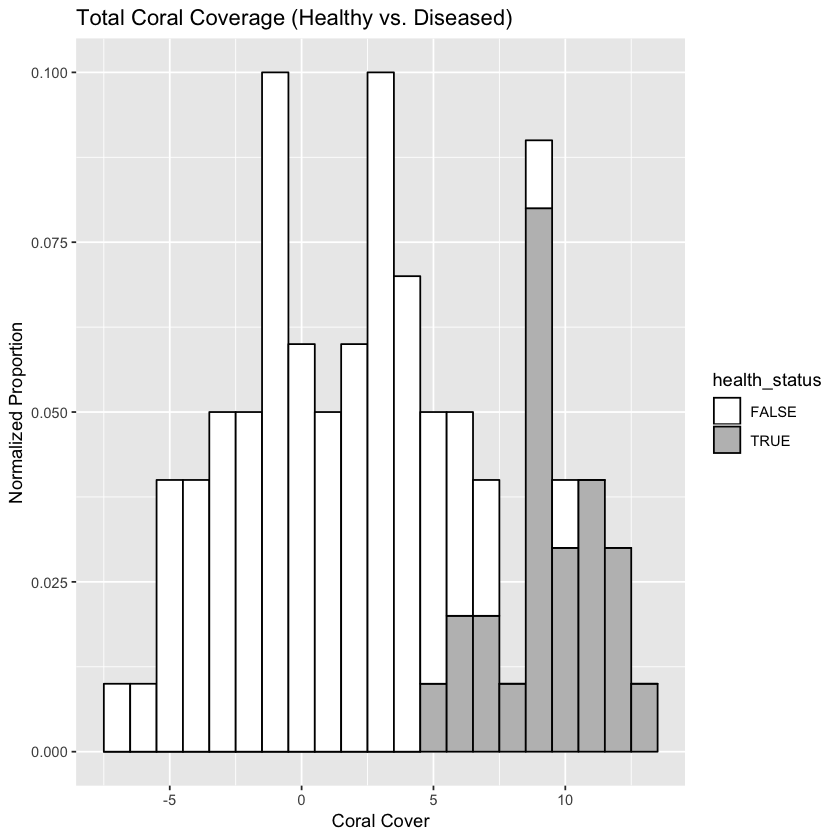

In [150]:
# Write you answer here and use more cell if needed

ggplot(coral_cover_tbl, aes(x=coral_cover, y = stat(count / sum(count))))+
    geom_histogram(aes(fill=health_status), binwidth=1, color='black')+
    scale_fill_manual(values=c('white','grey'))+
    xlab("Coral Cover")+
    ylab("Normalized Proportion")+
    ggtitle("Total Coral Coverage (Healthy vs. Diseased)")

### Q6.

* Repeat the plot above by highlighting the distribution per species
* I am using `geom_density`
  * set the `adjust` param of `geom_density` to `2`
* Change the `xlim` scale so that we can see the edges of the curves
  * I.e., curves should not be cutoff


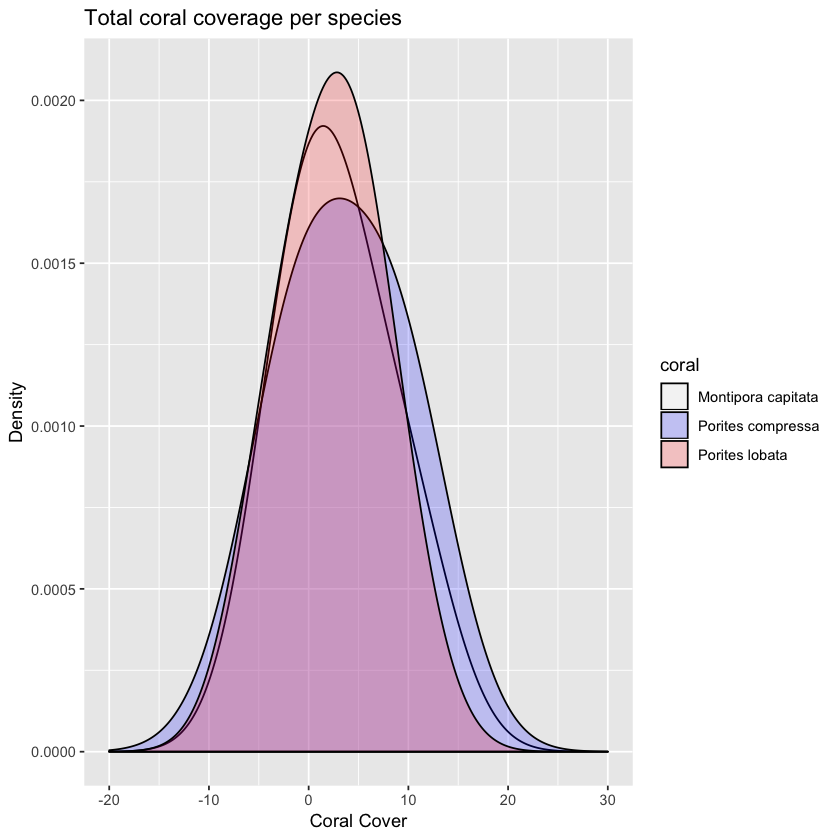

In [151]:
ggplot(coral_health_tbl) +
  geom_density(aes(x=coral_cover, y=stat(count / sum(count)), fill=coral), 
                  colour="black", alpha=0.2, adjust=2)+
 scale_fill_manual(values=c("white", "Blue", "red")) +
 labs(x="Coral Cover", y="Density", title="Total coral coverage per species")+ 
 xlim(-20, 30)



### Q6 -- Challenge


Recall problem `8` in the airquality dataset.
  * Remember that you can import that dataset using `data(airquality)`
1. Convert the `airquality` dataframe to a tibble called `airq_tbl`
2. Replace the missing values for Solar.R using that month's average.
    * Example:
        * The missing value for line 6 in `airq_tbl`should be replaced with the average for month 5.
        * The missing value for line 97 in `airq_tbl` should be replaced with the average for month 8.

* Strategy:
  1. Compute the average values for months 5, 6, 7, 8, and 9 in a names vector called `monthly_avg_SolarR`
      * monthly_avg_SolarR[5] should return the average for May.
      * monthly_avg_SolarR[6] should return the average for June.
      * etc.
      * This is an ideal use case for `tapply` with `na.rm=TRUE` (ask me!)
  2. for each line of airq_tbl check value of Solar.R and do:
    * if value is not `na`, return the value
    * if value if `na`; return avg associated with `Month`
    * This is an ideal case for `apply`
      * You need to write your own function (call it `fix_missing_solar_R`)
      * Recall that the argument to that function is a complete row as a vector!
    * test your function with the following line to make sure it's working
    ```fix_missing_solar_R(airq_tbl[5,])```

In [185]:
data(airquality)
airq_tbl = as_tibble(airquality)
head(airq_tbl)

Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<dbl>,<int>,<int>,<int>
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


In [195]:
monthly_avg_SolarR = tapply(airq_tbl$Solar.R, airq_tbl$Month, mean, na.rm=TRUE)
monthly_avg_SolarR
monthly_avg_SolarR[as.character(5)]

5        6        7        8        9 
181.2963 190.1667 216.4839 171.8571 167.4333

5 
181.2963

In [217]:
monthly_avg_SolarR = tapply(airq_tbl$Solar.R, airq_tbl$Month, mean, na.rm=TRUE)

fix_missing_solar_R = function(x){
    
    if(is.na(x["Solar.R"])){
        monthly_avg_SolarR[as.character(x["Month"])]
    }else{
        x["Solar.R"]
    }   
}
fix_missing_solar_R(airq_tbl[5,])

5 
181.2963

In [220]:
SolarR_fixed = apply(airq_tbl, 1, fix_missing_solar_R)
SolarR_fixed

[1] 190.0000 118.0000 149.0000 313.0000 181.2963 181.2963 299.0000  99.0000
  [9]  19.0000 194.0000 181.2963 256.0000 290.0000 274.0000  65.0000 334.0000
 [17] 307.0000  78.0000 322.0000  44.0000   8.0000 320.0000  25.0000  92.0000
 [25]  66.0000 266.0000 181.2963  13.0000 252.0000 223.0000 279.0000 286.0000
 [33] 287.0000 242.0000 186.0000 220.0000 264.0000 127.0000 273.0000 291.0000
 [41] 323.0000 259.0000 250.0000 148.0000 332.0000 322.0000 191.0000 284.0000
 [49]  37.0000 120.0000 137.0000 150.0000  59.0000  91.0000 250.0000 135.0000
 [57] 127.0000  47.0000  98.0000  31.0000 138.0000 269.0000 248.0000 236.0000
 [65] 101.0000 175.0000 314.0000 276.0000 267.0000 272.0000 175.0000 139.0000
 [73] 264.0000 175.0000 291.0000  48.0000 260.0000 274.0000 285.0000 187.0000
 [81] 220.0000   7.0000 258.0000 295.0000 294.0000 223.0000  81.0000  82.0000
 [89] 213.0000 275.0000 253.0000 254.0000  83.0000  24.0000  77.0000 171.8571
 [97] 171.8571 171.8571 255.0000 229.0000 207.0000 222.0000 137.0000 192.0000
[105] 273.0000 157.0000  64.0000  71.0000  51.0000 115.0000 244.0000 190.0000
[113] 259.0000  36.0000 255.0000 212.0000 238.0000 215.0000 153.0000 203.0000
[121] 225.0000 237.0000 188.0000 167.0000 197.0000 183.0000 189.0000  95.0000
[129]  92.0000 252.0000 220.0000 230.0000 259.0000 236.0000 259.0000 238.0000
[137]  24.0000 112.0000 237.0000 224.0000  27.0000 238.0000 201.0000 238.0000
[145]  14.0000 139.0000  49.0000  20.0000 193.0000 145.0000 191.0000 131.0000
[153] 223.0000